# Tanzania Water Well

Ronak Parekh

## Main problem

The stakeholder will be the Tanzanian government. The reason for this project is to help figure out the government in determining the functionality of the water wells, as well as creating a predictive model in order to reccomendations for the better use of these wells. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder

from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing


In [2]:
df = pd.read_csv('clean_data.csv') # taking data to df

In [3]:
df.columns

Index(['Unnamed: 0', 'gps_height', 'longitude', 'latitude', 'basin', 'region',
       'district_code', 'population', 'public_meeting', 'permit',
       'construction_year', 'extraction_type_group', 'management',
       'management_group', 'payment', 'water_quality', 'quantity', 'source',
       'waterpoint_type', 'status_group', 'decade'],
      dtype='object')

In [4]:
df= df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.columns

Index(['gps_height', 'longitude', 'latitude', 'basin', 'region',
       'district_code', 'population', 'public_meeting', 'permit',
       'construction_year', 'extraction_type_group', 'management',
       'management_group', 'payment', 'water_quality', 'quantity', 'source',
       'waterpoint_type', 'status_group', 'decade'],
      dtype='object')

In [6]:
df1 = df.copy()

In [7]:
df1['permit'] = df1['permit'].astype(bool).astype(int)

In [8]:
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int)

In [9]:
cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade', 'management_group']

In [10]:
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit', 'construction_year']

# Baseline Model/RandomForest

In [11]:
target='status_group'

In [12]:
used_cols = [c for c in df1.columns.tolist() if c not in [target]]
X=df1[used_cols]
y=df1[target]

In [13]:
used_cols

['gps_height',
 'longitude',
 'latitude',
 'basin',
 'region',
 'district_code',
 'population',
 'public_meeting',
 'permit',
 'construction_year',
 'extraction_type_group',
 'management',
 'management_group',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'decade']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
# choosing scaler and encoder
scaler=RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# set rf with best grid search results

rf = RandomForestClassifier()

#giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)


pipe.fit(X_train,y_train)
# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


Accuracy:
TRAIN: 0.9951964085297419
TEST: 0.7995959595959596

Balanced Accuracy:
TRAIN: 0.9875556413977057
TEST: 0.6683049715587179


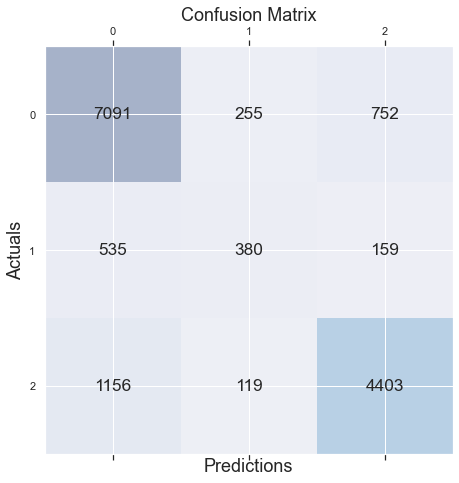

In [16]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

The model is highly overfit. To handle with overfit SMOTE technique will be used

# Decision Tree Classifier

In [17]:
#seting model
dt = DecisionTreeClassifier()


#sending everthing in pipe
pipe = make_pipeline(preprocessor,dt)
pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9952188552188552
TEST: 0.74989898989899

Balanced Accuracy:
TRAIN: 0.9869295800730011
TEST: 0.6471169222310431


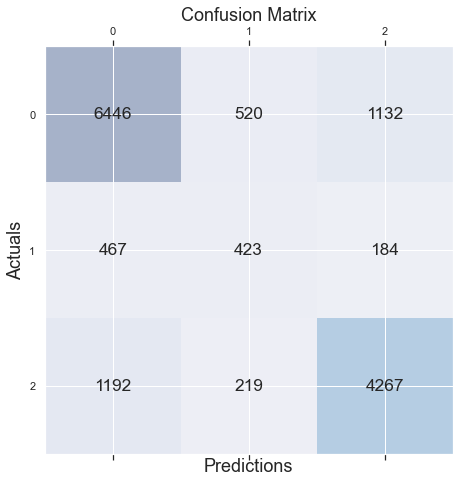

In [18]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XG Boost

In [19]:
xgb = XGBClassifier()

pipe = make_pipeline(preprocessor,xgb)
pipe.fit(X_train, y_train)


# make predictions on training set
y_pred = pipe.predict(X_train)

# make predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

[06:04:45] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:
TRAIN: 0.840246913580247
TEST: 0.7933333333333333

Balanced Accuracy:
TRAIN: 0.694968880876801
TEST: 0.6348444651253332


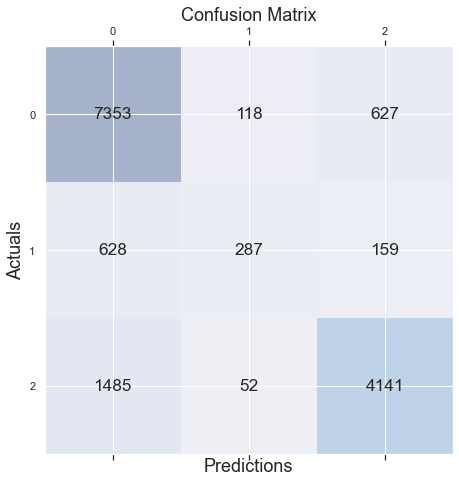

In [20]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# SMOTE

In [21]:
df2=df1.copy()

## Encoding and scaling the dataframe for SMOTE

In [22]:
# encoding categorical columns
encoder = TargetEncoder()

for c in cat_col:
    df2[str(c) + '_encoded'] = encoder.fit_transform(df2[c].values, df2[target])
    df2.drop(columns=c, inplace=True) 

In [23]:
# scaling numerical columns

scaler = preprocessing.RobustScaler()


def scaleColumns(df, num_col):
    for col in num_col:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df2[col])),columns=[col])
    return df

scaled_df = scaleColumns(df2,[num_col])


In [24]:
# assign X and y
used_cols = [c for c in scaled_df.columns.tolist() if c not in [target]]
X=scaled_df[used_cols]
y=scaled_df[target]


In [25]:
# making over-sampling 

smt = SMOTE(sampling_strategy = 'auto', n_jobs = -1)

X_sampled, y_sample = smt.fit_resample(X, y)

print(y.value_counts())

y_sampled = pd.Series(y_sample) # converting from array to np.series to see value_counts

print(y_sampled.value_counts())

0    32259
2    22824
1     4317
Name: status_group, dtype: int64
0    32259
1    32259
2    32259
Name: status_group, dtype: int64


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, random_state=42)

# XG Boost

In [27]:
xgb2 = RandomForestClassifier()


xgb2.fit(X_train, y_train)


# predictions of training set
y_pred = xgb2.predict(X_train)

# redictions of test set
y_pred_test = xgb2.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


Accuracy:
TRAIN: 0.995343198038081
TEST: 0.8593097747468486

Balanced Accuracy:
TRAIN: 0.9953369851492934
TEST: 0.8594608371138258


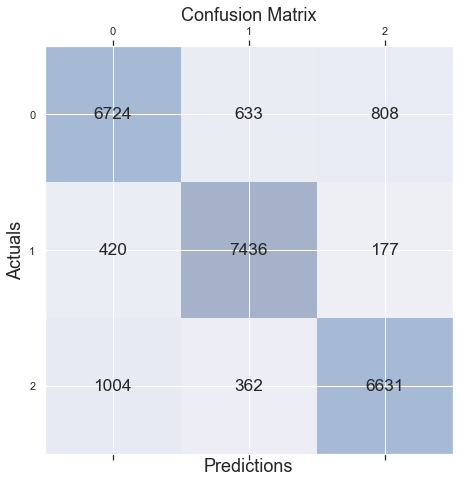

In [28]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## RandomForest

In [29]:
rfc2 = RandomForestClassifier()


rfc2.fit(X_train, y_train)


# predictions of training set
y_pred = rfc2.predict(X_train)

# redictions of test set
y_pred_test = rfc2.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9953707530792758
TEST: 0.8590617896259558

Balanced Accuracy:
TRAIN: 0.9953638881781481
TEST: 0.8592288982778237


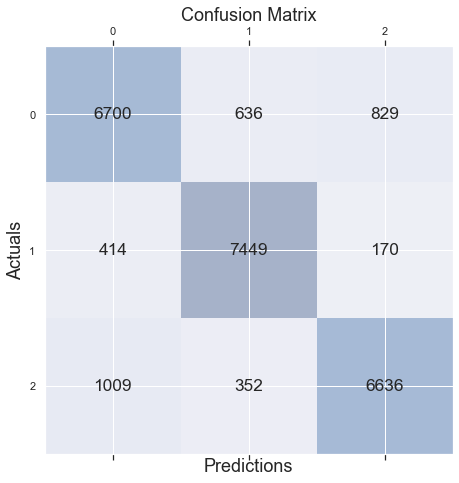

In [30]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [31]:
dt2 = DecisionTreeClassifier()


dt2.fit(X_train, y_train)


# predictions of training set
y_pred = dt2.predict(X_train)

# redictions of test set
y_pred_test = dt2.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9953845305998732
TEST: 0.8090927877660674

Balanced Accuracy:
TRAIN: 0.9953785646392285
TEST: 0.8093600480580473


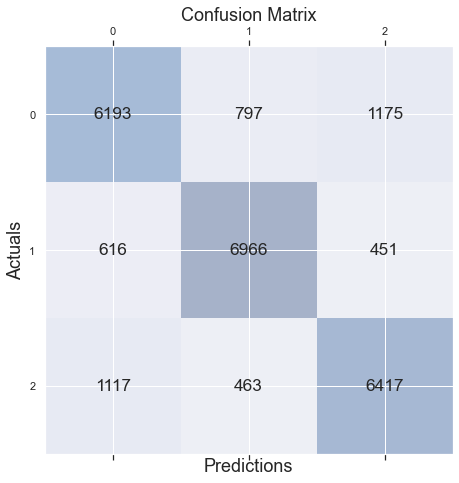

In [32]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Conclusion

- The baseline model without being balanced gave a balanced accuracy of .66
- In order to make sure the model is not overfit a technique was used which is SMOTE in order to have balanced classes
- After SMOTE both XG Boost and the Random Model gave a balanced accuracy of 85%
- There is some overfitting still which can be worked on with tuning the parameters